In [3]:
import numpy as np

reward_trace = np.load("rl_chess/logs/puzzle_reward_trace.npy")
print(reward_trace.shape)

(514000,)


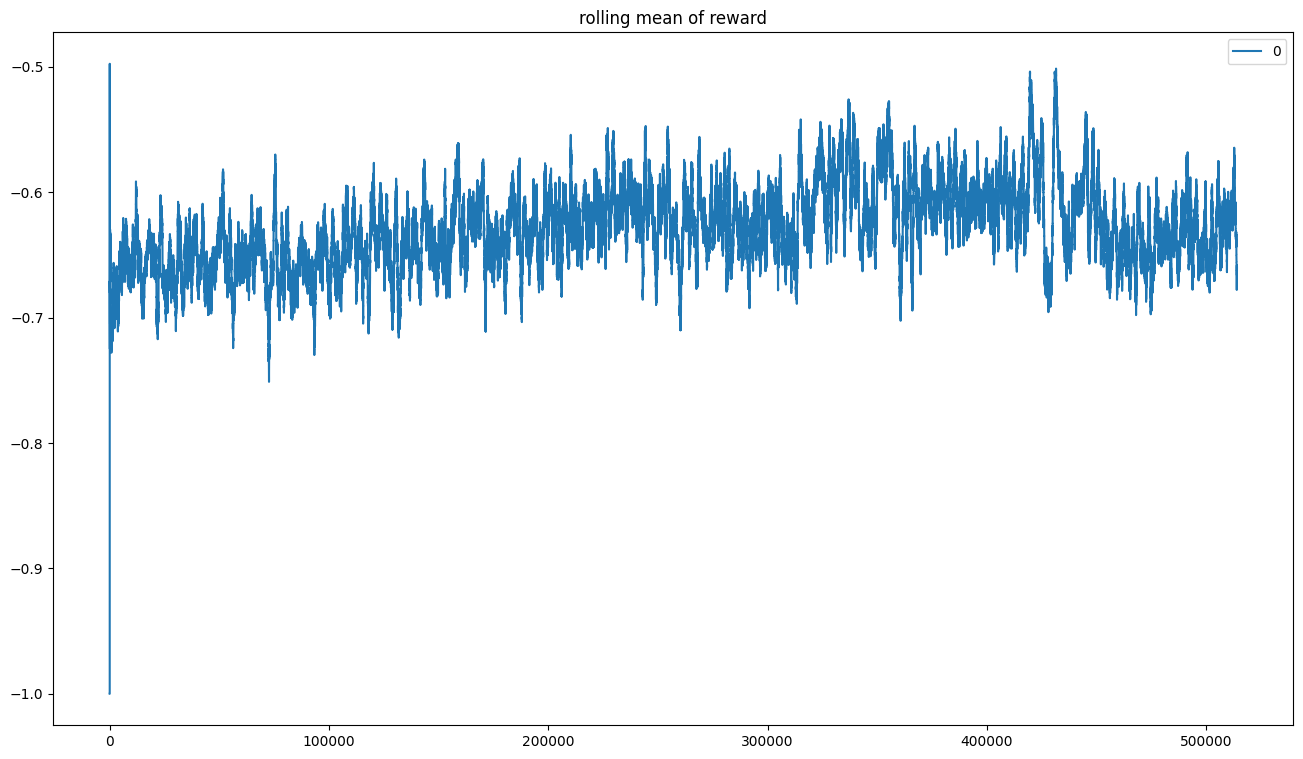

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

reward_smooth = pd.DataFrame(reward_trace)
reward_smooth.rolling(window=1000, min_periods=0).mean().plot(
    figsize=(16, 9), title="rolling mean of reward"
)
plt.show()

In [32]:
from rl_chess import agent

puzzle_player = agent.Agent(lr=0.01, network="big")
# puzzle_player.load("rl_chess/weights/puzzle_big")

engine_player = agent.Agent(lr=0.01, network="big")
# engine_player.load("rl_chess/weights/engine_big")

In [ ]:
from rl_chess import environment, learn

from tqdm import tqdm

n = 10

puzzle_wins = 0
engine_wins = 0

for i in tqdm(range(n)):
    env = environment.Board(FEN=None)
    learned_puzzle = learn.TD_search(env, puzzle_player, name="puzzle")
    learned_engine = learn.TD_search(env, engine_player, name="engine")

    while env.board.result() == "*":
        move = learned_engine.select_move(None)
        env.board.push(move)
        env.update_layer_board(move)

        if env.board.result() == "1-0":
            engine_wins += 1
            break
        elif env.board.result() == "1/2-1/2":
            break

        move = learned_puzzle.select_move(None)
        env.board.push(move)
        env.update_layer_board(move)

        if env.board.result() == "1-0":
            puzzle_wins += 1
            break
        elif env.board.result() == "1/2-1/2":
            break

In [46]:
engine_wins

0